# Read and visualise L-band SAR image

#### SAOCOM



In [1]:
from pystac_client import Client 
import folium
import os


In [2]:

esa_catalog = Client.open("https://eocat.esa.int/eo-catalogue/")

esa_catalog

<Client id=fedeo>

In [3]:
collections = esa_catalog.get_collections()

max_length = max(len(collection.id) for collection in collections)

for child in esa_catalog.get_children():
    print(f"{child.id.ljust(max_length)} : {child.title}")

/home/ljovic/.local/lib/python3.10/site-packages/pystac_client/client.py:440: DoesNotConformTo: Server does not conform to COLLECTIONS, FEATURES
  self._warn_about_fallback("COLLECTIONS", "FEATURES")
/home/ljovic/.local/lib/python3.10/site-packages/pystac_client/client.py:440: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


eo:platform                          : EO platforms
5c476560-e0a3-554a-9187-187a90da1309 : Earth Topic
c98c8eae-7561-55de-bf01-2fb866693c14 : Instrument
738c519f-48db-5344-bebc-030c16781c22 : Platform
1eb0ea0a-312c-4d74-8d42-6f1ad758f999 : Science Keywords
eo:organisationName                  : EO organisations


In [4]:
collection_id = '738c519f-48db-5344-bebc-030c16781c22'

collection = esa_catalog.get_collection(collection_id)
collection

/home/ljovic/.local/lib/python3.10/site-packages/pystac_client/client.py:409: DoesNotConformTo: Server does not conform to COLLECTIONS, FEATURES
  self._warn_about_fallback("COLLECTIONS", "FEATURES")
/home/ljovic/.local/lib/python3.10/site-packages/pystac_client/client.py:409: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


<CollectionClient id=eo:organisationName>

In [5]:
type(collection)

pystac_client.collection_client.CollectionClient

#### Sentinel-1 EODC

In [6]:
latmin, latmax = 47.6, 48 # South to North
lonmin, lonmax = 16.5, 17 # West to East

bounding_box = [lonmin, latmin, lonmax, latmax]

map = folium.Map(location=[(latmin+latmax)/2, (lonmin+lonmax)/2], zoom_start=10.4,
                                  zoom_control=False,
                                  scrollWheelZoom=False,
                                  dragging= False)

folium.Rectangle(
    bounds=[[latmin, lonmin],
            [latmax, lonmax]],
    color="red",
).add_to(map)


folium.LayerControl().add_to(map)

map

In [7]:
eodc_catalog = Client.open("https://stac.eodc.eu/api/v1")

colllection_id = 'SENTINEL1_SIG0_20M'
time_range = "2022-10-01/2022-10-07"

search = eodc_catalog.search(
    collections=colllection_id,
    bbox=bounding_box,
    datetime=time_range,
)

sentinel1_items = search.item_collection()
print(f"On EODC we found {len(sentinel1_items)} items for the given search query")

On EODC we found 15 items for the given search query


#### Proper

In [8]:
import rasterio
import matplotlib.pyplot as plt

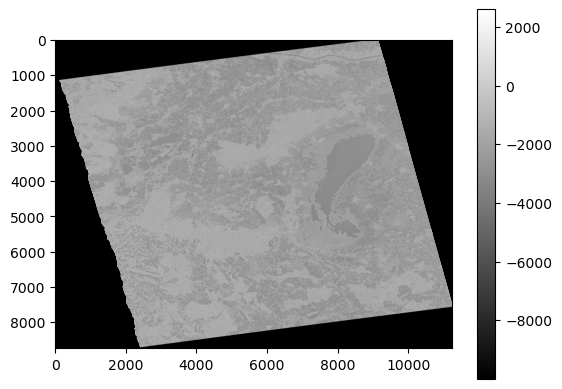

In [9]:
path_vh = "/home/ljovic/Desktop/Material_for_inclass_notebooks_24/Unit2-saocom_gamma/EOL1ASARSAO1B7644790/EOL1ASARSAO1B7644790_GAM0_VH.tif"

vh = rasterio.open(path_vh)
plt.imshow(vh.read(1), cmap='gray')
plt.colorbar()


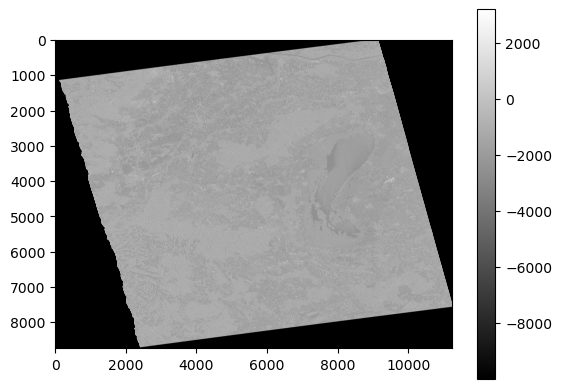

In [10]:
path_vv = "/home/ljovic/Desktop/Material_for_inclass_notebooks_24/Unit2-saocom_gamma/EOL1ASARSAO1B7644790/EOL1ASARSAO1B7644790_GAM0_VV.tif"

vv = rasterio.open(path_vv)
plt.imshow(vv.read(1), cmap='gray')
plt.colorbar()

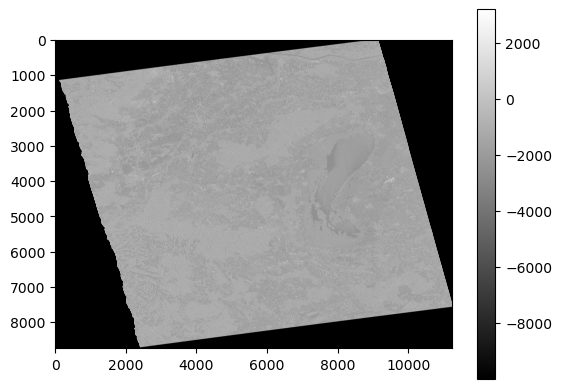

In [11]:
path_PLIA = "/home/ljovic/Desktop/Material_for_inclass_notebooks_24/Unit2-saocom_gamma/EOL1ASARSAO1B7644790/EOL1ASARSAO1B7644790_GAM0_VV.tif"

PLIA = rasterio.open(path_PLIA)
plt.imshow(PLIA.read(1), cmap='gray')
plt.colorbar()

## Sentinel 1

##### 1) SLC_S1_images

In [12]:
base_dir = "/home/ljovic/Desktop/Material_for_inclass_notebooks_24/Unit3-sentinel1_interferogram"



##### 2) Coregistered_images_IW3

As we want to compare different acqusitions over same area, it is important to coregister images - so each ground target contributes the same in both images.

In [13]:
coregistered_file = "S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B_Orb_Stack_IW3_Cnv.tif"
path_coregistered = os.path.join(base_dir, "2)coregistered_images_IW3", coregistered_file)

coregistered = rasterio.open(path_coregistered)


/home/ljovic/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Warning 1: TIFFFetchNormalTag:Incorrect count for "GeoTiePoints"; tag ignored
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


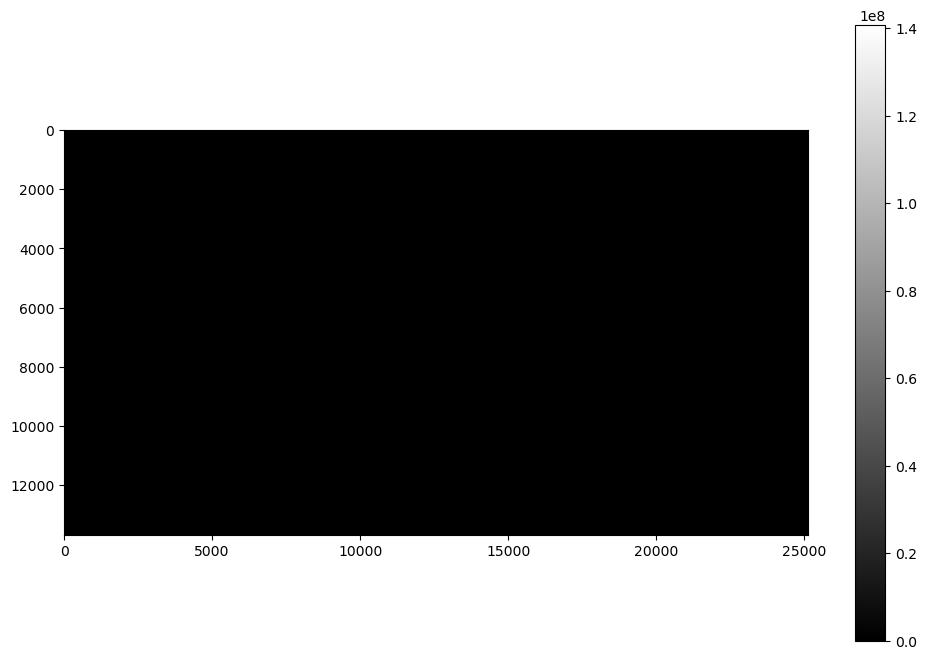

In [14]:
plt.figure(figsize=(12, 8))
plt.imshow(coregistered.read(1), cmap='gray')
plt.colorbar()


##### 3) Interferogram_and_coherence_formation

In [15]:
interferogram_and_coherence_file = "S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B_Orb_Stack_IW3_ifg_Cnv.tif"
path_interferogram_and_coherence = os.path.join(base_dir, "3)interferogram_and_coherence_formation", interferogram_and_coherence_file)

interferogram_and_coherence = rasterio.open(path_interferogram_and_coherence)


Warning 1: TIFFFetchNormalTag:Incorrect count for "GeoTiePoints"; tag ignored
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


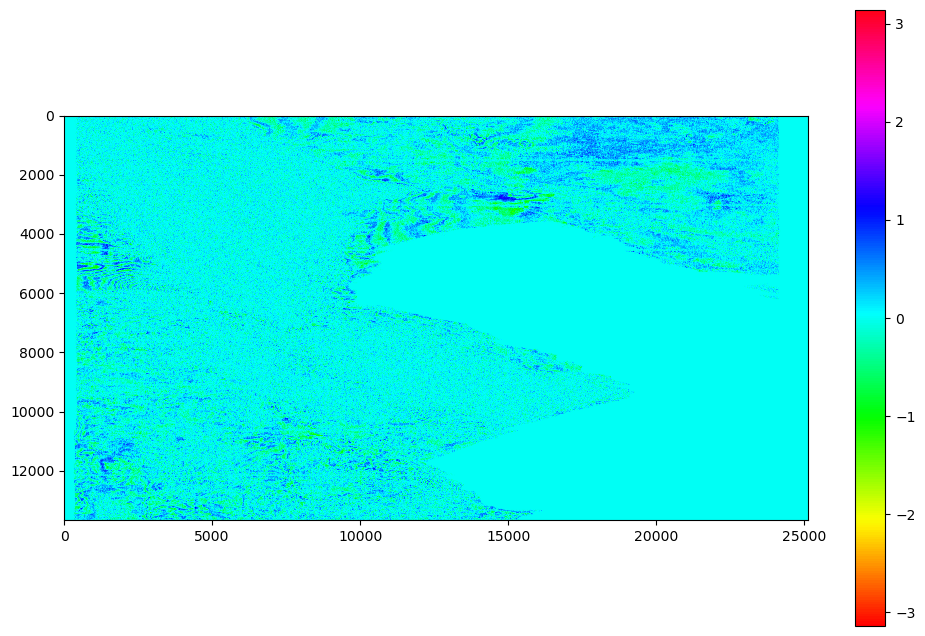

In [16]:
plt.figure(figsize=(12, 8))
plt.imshow(interferogram_and_coherence.read(1), cmap='hsv')
plt.colorbar()


##### 4) Debursted_images

Warning 1: TIFFFetchNormalTag:Incorrect count for "GeoTiePoints"; tag ignored
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


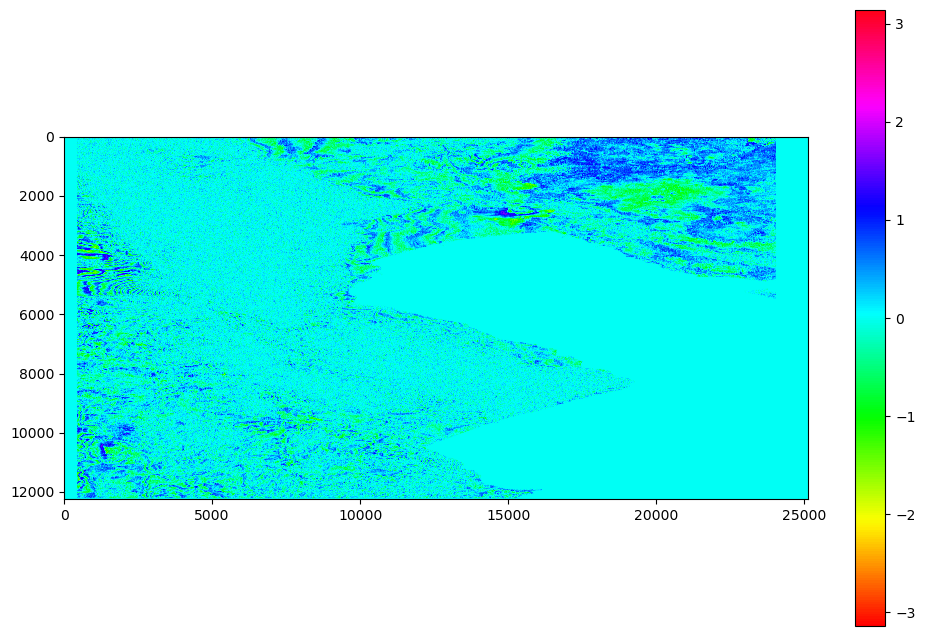

In [17]:
debursted_file = "S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B_Orb_Stack_IW3_ifg_deb_Cnv.tif"
path_debursted = os.path.join(base_dir, "4)debursted_images", debursted_file)

debursted = rasterio.open(path_debursted)
plt.figure(figsize=(12, 8))
plt.imshow(debursted.read(1), cmap='hsv')
plt.colorbar()

##### 5) Topographic_phase_removal

Warning 1: TIFFFetchNormalTag:Incorrect count for "GeoTiePoints"; tag ignored
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


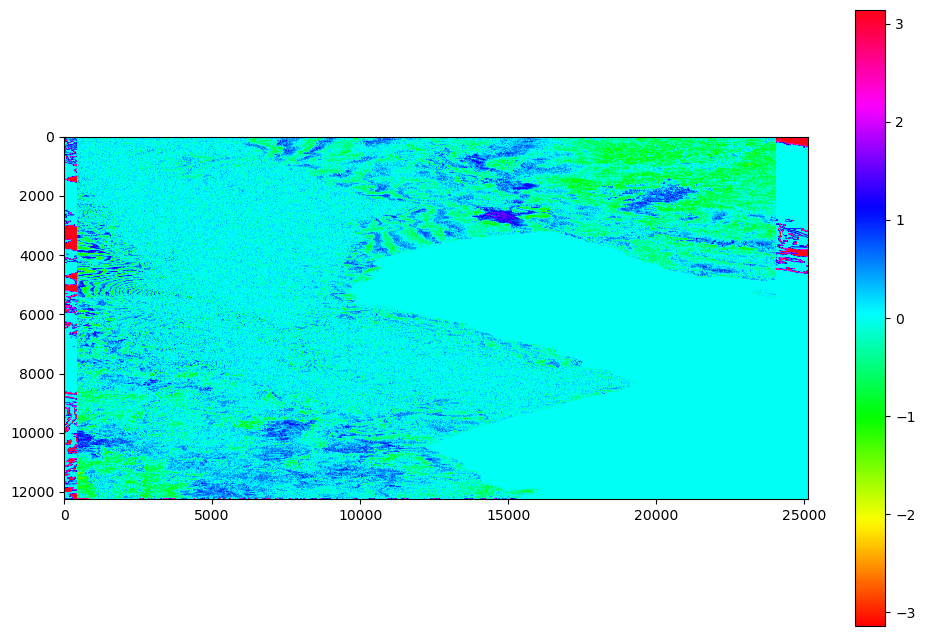

In [18]:
topo_phase_removed_file = "S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B_Orb_Stack_IW3_ifg_deb_dinsar_Cnv.tif"
path_topo_phase_removed = os.path.join(base_dir, "5)topographic_phase_removal", topo_phase_removed_file)

topo_phase_removed = rasterio.open(path_topo_phase_removed)
plt.figure(figsize=(12, 8))
plt.imshow(topo_phase_removed.read(1), cmap='hsv')
plt.colorbar()

##### 6) Multilooking_and_filtering

Warning 1: TIFFFetchNormalTag:Incorrect count for "GeoTiePoints"; tag ignored


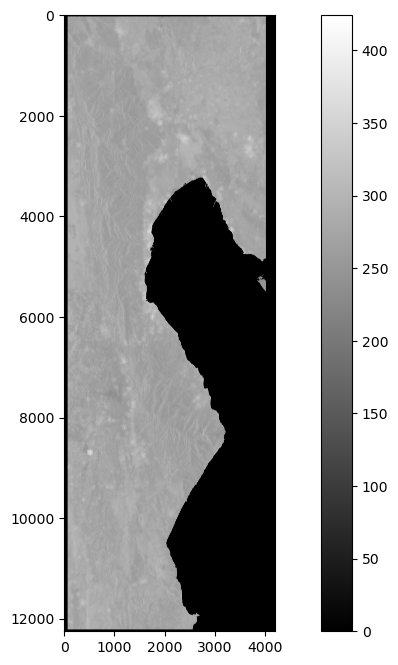

In [19]:
multilooking_and_filtering_file = "S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B_Orb_Stack_IW3_ifg_deb_dinsar_ML_flt_Cnv.tif"
path_multilooking_and_filtering = os.path.join(base_dir, "6)multilooking_and_filtering", multilooking_and_filtering_file)

multilooking_and_filtering = rasterio.open(path_multilooking_and_filtering)
plt.figure(figsize=(12, 8))
plt.imshow(multilooking_and_filtering.read(1), cmap='gray')
plt.colorbar()

##### 7) Geocoding

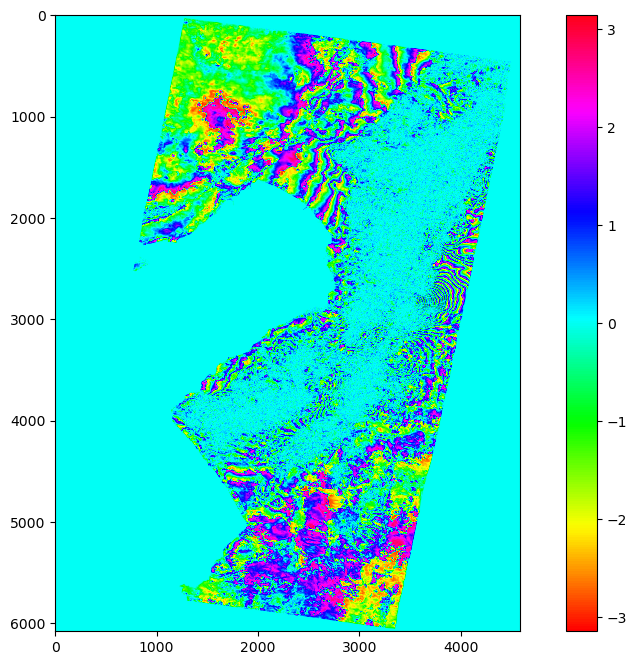

In [20]:
geocoded_file = "S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B_Orb_Stack_IW3_ifg_deb_dinsar_ML_flt_TC_Cnv.tif"
path_geocoded = os.path.join(base_dir, "7)geocoding", geocoded_file)

coregistered = rasterio.open(path_geocoded)
plt.figure(figsize=(12, 8))
plt.imshow(coregistered.read(1), cmap='hsv')
plt.colorbar()

In [21]:
import numpy as np

masked_data = np.ma.masked_equal(coregistered.read(1), coregistered.nodata)
